# v's from galactic SN at Super-Kamiokande

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
# Emission parameters

# Total energy released in v's; 1 erg = 624151 MeV
Etot=3e+53*624151
# v-sphere temperatures for each flavor /MeV
Te=4
Tebar=5
Tx=8
# Distance from Earth /cm; 1kpc=3.086e+21cm
d=10*3.086e+21

Ev=np.linspace(0,100,1000)

from spectra import spectrum_fd
# v-sphere spectra / v's/MeV/cm^2
f0_e=spectrum_fd(Ev,Etot/6,Te) /(4*np.pi*d**2)
f0_ebar=spectrum_fd(Ev,Etot/6,Tebar) /(4*np.pi*d**2)
f0_x=spectrum_fd(Ev,Etot/6,Tx) /(4*np.pi*d**2)

plt.plot(Ev,Ev*f0_e,label='nu_e')
plt.plot(Ev,Ev*f0_ebar,label='nu_e_bar')
plt.plot(Ev,Ev*f0_x,label='nu_x')
plt.legend()
plt.xlabel('E/MeV')
plt.ylabel('Flux /Mev/(MeV*cm^2)')
plt.show()



RuntimeError: latex was not able to process the following string:
b'Flux /Mev/(MeV*cm^2)'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.6)
entering extended mode
(C:/Users/rafae/.matplotlib/tex.cache/80cc9816a051d654fb0b258548c90839.tex
LaTeX2e <2021-06-01>
L3 programming layer <2021-06-01>
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/02/12 v1.4n Standard LaTeX document class
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\rafae\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file 80cc9816a051d654fb0b258548c90839.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily Flux /Mev/(MeV*cm^
                                  2)}
No pages of output.
Transcript written on 80cc9816a051d654fb0b258548c90839.log.




<Figure size 432x288 with 1 Axes>

In [ ]:
# Spectra after msw mixing
from mix import mix_ad

## normal hierarchy

f_e_nh=mix_ad(f0_e,f0_ebar,f0_x,'nu_e','nh')
f_ebar_nh=mix_ad(f0_e,f0_ebar,f0_x,'nu_ebar','nh')
f_x_nh=mix_ad(f0_e,f0_ebar,f0_x,'nu_x','nh')

## inverted hierarchy

f_e_ih=mix_ad(f0_e,f0_ebar,f0_x,'nu_e','ih')
f_ebar_ih=mix_ad(f0_e,f0_ebar,f0_x,'nu_ebar','ih')
f_x_ih=mix_ad(f0_e,f0_ebar,f0_x,'nu_x','ih')

plt.plot(Ev,f_e_nh,label='nu_e (nh)')
plt.plot(Ev,f_e_ih,label='nu_e (ih)')
plt.legend()
plt.show()

plt.plot(Ev,f_ebar_nh,label='nu_ebar (nh)')
plt.plot(Ev,f_ebar_ih,label='nu_ebar (ih)')
plt.legend()
plt.show()

plt.plot(Ev,f_x_nh,label='nu_x (nh)')
plt.plot(Ev,f_x_ih,label='nu_x (ih)')
plt.legend()
plt.show()



In [ ]:
# Number of targets in the detector (Super-Kamiokande)
Mfid=22.5e+6 #fiducial mass of water /kg
MM=18.01528e-3 #molar mass of water /kg/mol
N_av=6.0221409e+23 # Avogadro's number

Np=2*N_av*Mfid/MM
Ne=10*N_av*Mfid/MM
Nox=N_av*Mfid/MM

# Calculating the number of events differential in v energy
## We'll use ibd for nu_ebar, v-oxigen scattering for nu_e and nc elastic scattering for nu_x
from cross_sections import cs_ibd,cs_ve,cs_vO

plt.plot(Ev,Np*cs_ibd(Ev),label='IBD')
plt.plot(Ev,Ne*cs_ve(Ev,'nu_x'),label='v_x + e')
plt.plot(Ev,Nox*cs_vO(Ev),label='v_e+O')
plt.legend()
plt.yscale('log')
plt.show


dN_ibd_nh=Np*cs_ibd(Ev)*f_ebar_nh
dN_ox_nh=Nox*cs_vO(Ev)*f_e_nh
dN_nc_nh=Ne*f_x_nh*(2*cs_ve(Ev,'nu_x')+2*cs_ve(Ev,'nu_x_bar'))

dN_ibd_ih=Np*cs_ibd(Ev)*f_ebar_ih
dN_ox_ih=Nox*cs_vO(Ev)*f_e_ih
dN_nc_ih=Ne*f_x_ih*(2*cs_ve(Ev,'nu_x')+2*cs_ve(Ev,'nu_x_bar'))



In [ ]:
# Total number of events

N_ibd_nh=np.trapz(dN_ibd_nh,x=Ev)
N_ox_nh=np.trapz(dN_ox_nh,x=Ev)
N_nc_nh=np.trapz(dN_nc_nh,x=Ev)

N_ibd_ih=np.trapz(dN_ibd_ih,x=Ev)
N_ox_ih=np.trapz(dN_ox_ih,x=Ev)
N_nc_ih=np.trapz(dN_nc_ih,x=Ev)

Nev_nh=N_ibd_nh+N_ox_nh+N_nc_nh
Nev_ih=N_ibd_ih+N_ox_ih+N_nc_ih

In [55]:
import numpy as np
from matplotlib import pyplot as plt

from mix import mix_ad

y=lambda x,a,b,c:a*x+b*x**2+c*x**3
y1=lambda x: y(x,1,1,1)
y2=lambda x: y(x,2,2,2)
y3=lambda x: y(x,3,3,3)

Y1=mix_ad(y1,y2,y3,'nu_e','nh')

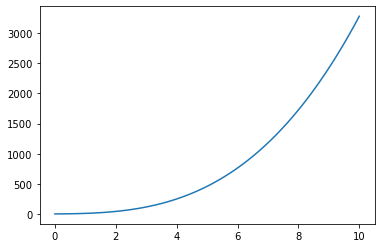

In [58]:
vec=np.linspace(0,10,100)
plt.plot(vec,Y1(vec))

In [60]:
plt.imshow(matrix)

NameError: name 'matrix' is not defined